Processing 1970–1974 ...
Processing 1975–1979 ...
Processing 1980–1984 ...
Processing 1985–1989 ...
Processing 1990–1994 ...
Processing 1995–1999 ...
Processing 2000–2004 ...
Processing 2005–2009 ...
Processing 2010–2014 ...
Processing 2015–2019 ...
Processing 2020–2024 ...


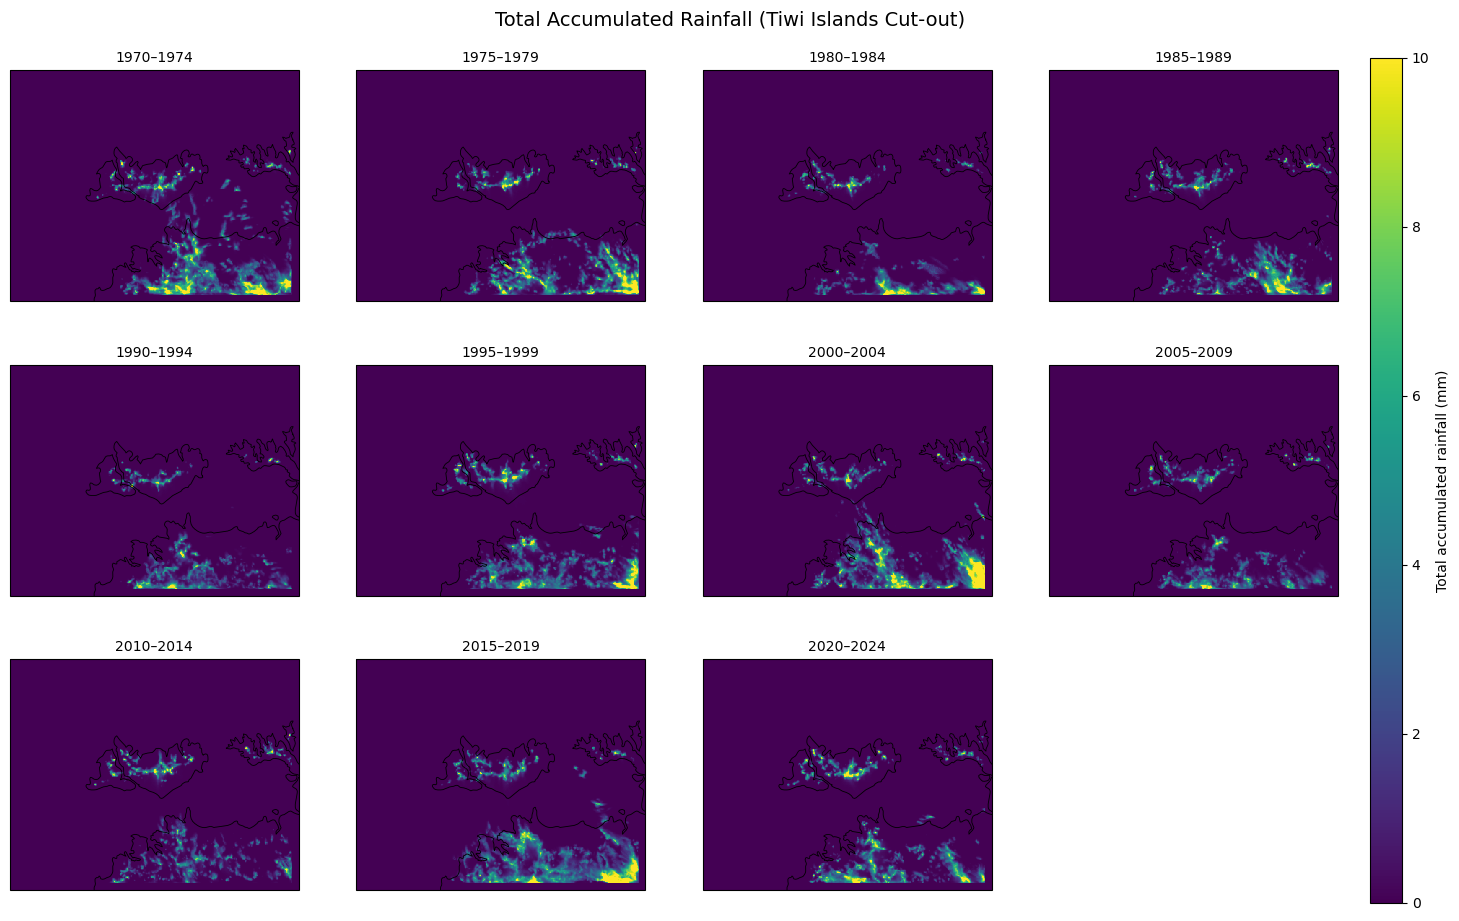

In [3]:
# 12 total rain for zero wind initialized cases for inner domain.
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# -------------------
# All 11 periods
# -------------------
periods = [
    ("1970–1974", "/g/data/gx60/experiments/2025-06-11_tiwi/19701101T0000Z/Tiwi_12h_1970-1974_windzero/Tiwi_1/RAL3P2/um/umnsaa_sfc000.nc"),
    ("1975–1979", "/g/data/gx60/experiments/2025-06-11_tiwi/19751101T0000Z/Tiwi_12h_1975-1979_windzero/Tiwi_1/RAL3P2/um/umnsaa_sfc000.nc"),
    ("1980–1984", "/g/data/gx60/experiments/2025-06-11_tiwi/19801101T0000Z/Tiwi_12h_1980-1984_windzero/Tiwi_1/RAL3P2/um/umnsaa_sfc000.nc"),
    ("1985–1989", "/g/data/gx60/experiments/2025-06-11_tiwi/19851101T0000Z/Tiwi_12h_1985-1989_windzero/Tiwi_1/RAL3P2/um/umnsaa_sfc000.nc"),
    ("1990–1994", "/g/data/gx60/experiments/2025-06-11_tiwi/19901101T0000Z/Tiwi_12h_1990-1994_windzero/Tiwi_1/RAL3P2/um/umnsaa_sfc000.nc"),
    ("1995–1999", "/g/data/gx60/experiments/2025-06-11_tiwi/19951101T0000Z/Tiwi_12h_1995-1999_windzero/Tiwi_1/RAL3P2/um/umnsaa_sfc000.nc"),
    ("2000–2004", "/g/data/gx60/experiments/2025-06-11_tiwi/20001101T0000Z/Tiwi_12h_2000-2004_windzero/Tiwi_1/RAL3P2/um/umnsaa_sfc000.nc"),
    ("2005–2009", "/g/data/gx60/experiments/2025-06-11_tiwi/20051101T0000Z/Tiwi_12h_2005-2009_windzero/Tiwi_1/RAL3P2/um/umnsaa_sfc000.nc"),
    ("2010–2014", "/g/data/gx60/experiments/2025-06-11_tiwi/20101101T0000Z/Tiwi_12h_2010-2014_windzero/Tiwi_1/RAL3P2/um/umnsaa_sfc000.nc"),
    ("2015–2019", "/g/data/gx60/experiments/2025-06-11_tiwi/20151101T0000Z/Tiwi_12h_2015-2019_windzero/Tiwi_1/RAL3P2/um/umnsaa_sfc000.nc"),
    ("2020–2024", "/g/data/gx60/experiments/2025-06-11_tiwi/20201101T0000Z/Tiwi_12h_2020-2024_windzero/Tiwi_1/RAL3P2/um/umnsaa_sfc000.nc"),
]

# -------------------
# Tiwi Islands cut-out
# -------------------
lat_min_exp = -11.95
lat_max_exp = -11.13
lon_min_exp = 130.0
lon_max_exp = 131.56

# -------------------
# Grid layout
# -------------------
ncols = 4
nrows = (len(periods) + ncols - 1) // ncols
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(4*ncols, 3.2*nrows),
                         subplot_kw={"projection": ccrs.PlateCarree()})

vmin = 0
vmax = 10
cmap = "viridis"

# -------------------
# Plotting loop
# -------------------
for (label, path), ax in zip(periods, axes.flat):
    print(f"Processing {label} ...")
    ds = xr.open_dataset(path)

    rain = ds["STASH_m01s04i201"].where(ds["STASH_m01s04i201"] > -1e8)

    lon = ds["longitude_t"]
    lat = ds["latitude_t"]

    total_rain = rain.sum(dim="t5min")
  
    pcm = ax.pcolormesh(lon, lat, total_rain,
                        cmap=cmap, vmin=vmin, vmax=vmax, shading="auto")
    ax.coastlines(resolution="10m", linewidth=0.6)
    ax.add_feature(cfeature.LAND, facecolor="lightgray", zorder=-1)
    ax.add_feature(cfeature.OCEAN, facecolor="white", zorder=-1)
    ax.set_title(label, fontsize=10)

# Hide unused subplots
for ax in axes.flat[len(periods):]:
    ax.set_visible(False)

# -------------------
# Colorbar on the right
# -------------------
fig.subplots_adjust(left=0.05, right=0.88, top=0.93, bottom=0.05, hspace=0.15, wspace=0.2)
cbar_ax = fig.add_axes([0.90, 0.05, 0.02, 0.88])  # [left, bottom, width, height]
cbar = fig.colorbar(pcm, cax=cbar_ax, label="Total accumulated rainfall (mm)")

fig.suptitle("Total Accumulated Rainfall (Tiwi Islands Cut-out)", fontsize=14)
plt.show()

Processing 1970–1974 ...


/g/data/xp65/public/apps/med_conda/envs/analysis3-25.12/lib/python3.11/site-packages/distributed/diagnostics/nvml.py:14: FutureWarning: The pynvml package is deprecated. Please install nvidia-ml-py instead. If you did not install pynvml directly, please report this to the maintainers of the package that installed pynvml for you.
  import pynvml


Processing 1975–1979 ...
Processing 1980–1984 ...
Processing 1985–1989 ...
Processing 1990–1994 ...
Processing 1995–1999 ...
Processing 2000–2004 ...
Processing 2005–2009 ...
Processing 2010–2014 ...
Processing 2015–2019 ...
Processing 2020–2024 ...


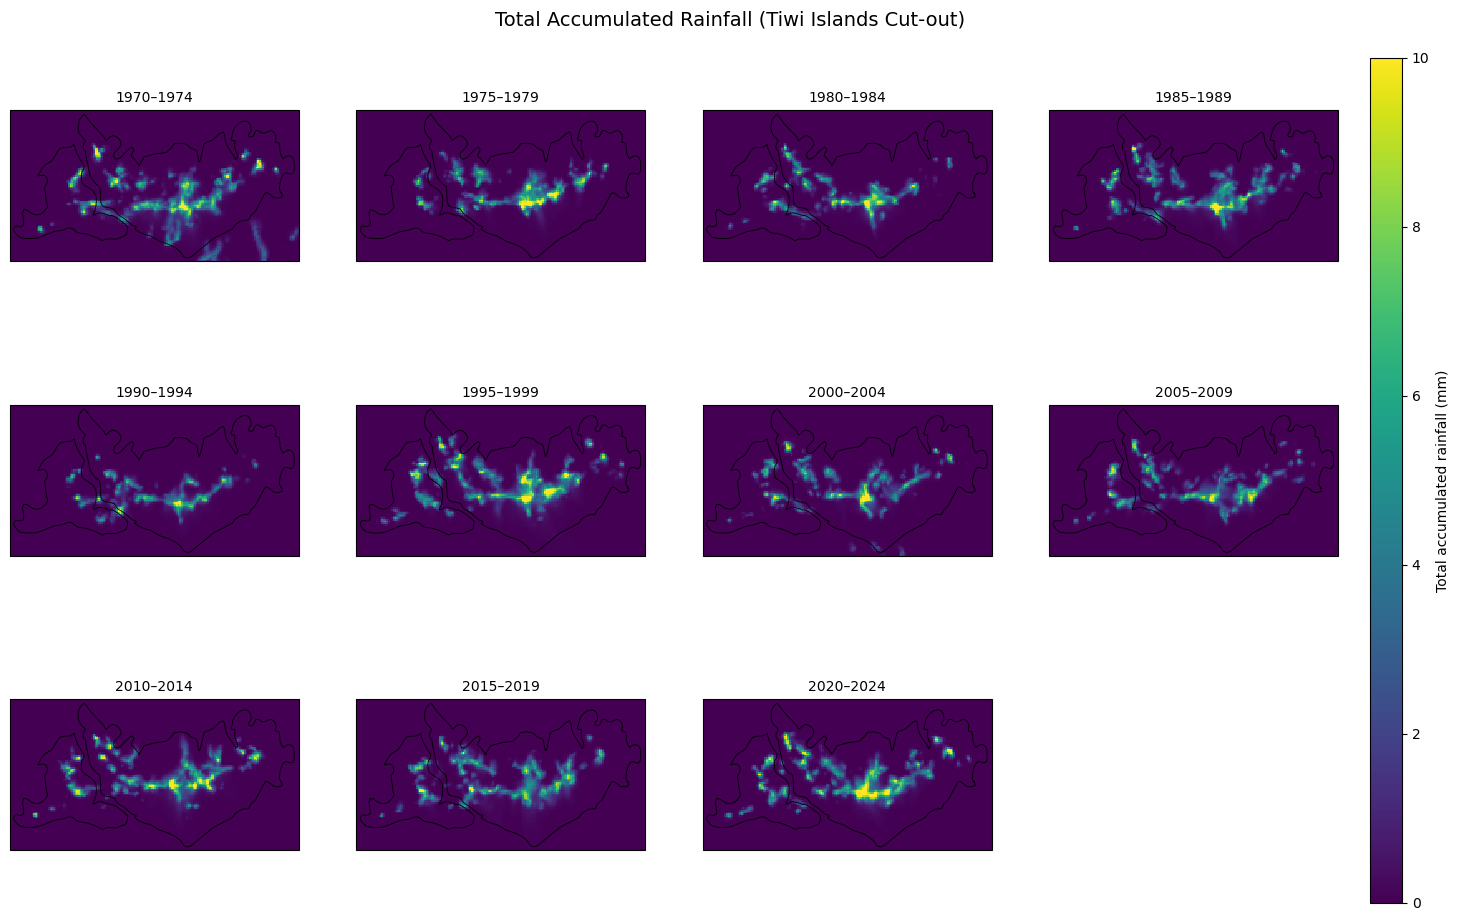

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# -------------------
# All 11 periods
# -------------------
periods = [
    ("1970–1974", "/g/data/gx60/experiments/2025-06-11_tiwi/19701101T0000Z/Tiwi_12h_1970-1974_windzero/Tiwi_1/RAL3P2/um/umnsaa_sfc000.nc"),
    ("1975–1979", "/g/data/gx60/experiments/2025-06-11_tiwi/19751101T0000Z/Tiwi_12h_1975-1979_windzero/Tiwi_1/RAL3P2/um/umnsaa_sfc000.nc"),
    ("1980–1984", "/g/data/gx60/experiments/2025-06-11_tiwi/19801101T0000Z/Tiwi_12h_1980-1984_windzero/Tiwi_1/RAL3P2/um/umnsaa_sfc000.nc"),
    ("1985–1989", "/g/data/gx60/experiments/2025-06-11_tiwi/19851101T0000Z/Tiwi_12h_1985-1989_windzero/Tiwi_1/RAL3P2/um/umnsaa_sfc000.nc"),
    ("1990–1994", "/g/data/gx60/experiments/2025-06-11_tiwi/19901101T0000Z/Tiwi_12h_1990-1994_windzero/Tiwi_1/RAL3P2/um/umnsaa_sfc000.nc"),
    ("1995–1999", "/g/data/gx60/experiments/2025-06-11_tiwi/19951101T0000Z/Tiwi_12h_1995-1999_windzero/Tiwi_1/RAL3P2/um/umnsaa_sfc000.nc"),
    ("2000–2004", "/g/data/gx60/experiments/2025-06-11_tiwi/20001101T0000Z/Tiwi_12h_2000-2004_windzero/Tiwi_1/RAL3P2/um/umnsaa_sfc000.nc"),
    ("2005–2009", "/g/data/gx60/experiments/2025-06-11_tiwi/20051101T0000Z/Tiwi_12h_2005-2009_windzero/Tiwi_1/RAL3P2/um/umnsaa_sfc000.nc"),
    ("2010–2014", "/g/data/gx60/experiments/2025-06-11_tiwi/20101101T0000Z/Tiwi_12h_2010-2014_windzero/Tiwi_1/RAL3P2/um/umnsaa_sfc000.nc"),
    ("2015–2019", "/g/data/gx60/experiments/2025-06-11_tiwi/20151101T0000Z/Tiwi_12h_2015-2019_windzero/Tiwi_1/RAL3P2/um/umnsaa_sfc000.nc"),
    ("2020–2024", "/g/data/gx60/experiments/2025-06-11_tiwi/20201101T0000Z/Tiwi_12h_2020-2024_windzero/Tiwi_1/RAL3P2/um/umnsaa_sfc000.nc"),
]

# -------------------
# Tiwi Islands cut-out
# -------------------
lat_min_exp = -11.95
lat_max_exp = -11.13
lon_min_exp = 130.0
lon_max_exp = 131.56

# -------------------
# Grid layout
# -------------------
ncols = 4
nrows = (len(periods) + ncols - 1) // ncols
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(4*ncols, 3.2*nrows),
                         subplot_kw={"projection": ccrs.PlateCarree()})

vmin = 0
vmax = 10
cmap = "viridis"

# -------------------
# Plotting loop
# -------------------
for (label, path), ax in zip(periods, axes.flat):
    print(f"Processing {label} ...")
    ds = xr.open_dataset(path)
    
    # Subset to Tiwi Islands
    rain = ds["STASH_m01s04i201"].where(ds["STASH_m01s04i201"] > -1e8)
    rain_subset = rain.sel(grid_latitude_t=slice(lat_min_exp, lat_max_exp),
                           grid_longitude_t=slice(lon_min_exp, lon_max_exp))
    lon_subset = ds["longitude_t"].sel(grid_latitude_t=slice(lat_min_exp, lat_max_exp),
                                      grid_longitude_t=slice(lon_min_exp, lon_max_exp))
    lat_subset = ds["latitude_t"].sel(grid_latitude_t=slice(lat_min_exp, lat_max_exp),
                                     grid_longitude_t=slice(lon_min_exp, lon_max_exp))
    
    total_rain = rain_subset.sum(dim="t5min")
    
    pcm = ax.pcolormesh(lon_subset, lat_subset, total_rain,
                        cmap=cmap, vmin=vmin, vmax=vmax, shading="auto")
    ax.coastlines(resolution="10m", linewidth=0.6)
    ax.add_feature(cfeature.LAND, facecolor="lightgray", zorder=-1)
    ax.add_feature(cfeature.OCEAN, facecolor="white", zorder=-1)
    ax.set_title(label, fontsize=10)

# Hide unused subplots
for ax in axes.flat[len(periods):]:
    ax.set_visible(False)

# -------------------
# Colorbar on the right
# -------------------
fig.subplots_adjust(left=0.05, right=0.88, top=0.93, bottom=0.05, hspace=0.15, wspace=0.2)
cbar_ax = fig.add_axes([0.90, 0.05, 0.02, 0.88])  # [left, bottom, width, height]
cbar = fig.colorbar(pcm, cax=cbar_ax, label="Total accumulated rainfall (mm)")

fig.suptitle("Total Accumulated Rainfall (Tiwi Islands Cut-out)", fontsize=14)
plt.show()